# <center><u><font color="#110896"> Machine Learning on Cardiovascular Disease Dataset</font></u></center>

## <font color="#110896"> Dataset Information

The cardiovascular disease dataset available on Kaggle is a comprehensive dataset that contains various features related to the health of individuals and their likelihood of developing cardiovascular disease. The dataset includes objective features such as age, height, weight, gender, and examination features such as systolic and diastolic blood pressure, cholesterol, and glucose levels. Additionally, the dataset includes subjective features such as smoking, alcohol intake, and physical activity. The target variable in this dataset is the presence or absence of cardiovascular disease.

In order to predict the presence or absence of cardiovascular disease, various machine learning algorithms can be used. One such algorithm is logistic regression. This algorithm is commonly used in medical research and can be used to predict the probability of a binary outcome.

For example, healthcare professionals can use this information to identify individuals who are at a higher risk of developing cardiovascular disease and develop appropriate interventions. Insurance companies can also use this information to set premiums based on the likelihood of an individual developing cardiovascular disease. 




## <font color="#110896"> Our Objective


We will construct a model to predict the presence or absence of cardiovascular disease. based on the input features. We will use a classification model to predict the presence or absence of cardiovascular disease (target variable ). We will evaluate the model using a confusion matrix and find precision and recall based on different predictive models using scikit-learn.


### <font color="#110896"> To begin our analysis, we'll first import the libraries we'll be using in this project.

In [112]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# for machine learning algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# for scale the data
from sklearn.preprocessing import StandardScaler

# performance evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

### <center><font color="#110896">Load The Dataset</font><center>


### <font color="#110896"> **Import the dataset**

In [113]:
# read the  dataset and store in the variable df and check the top ten rows of the dataset
df = pd.read_csv('/kaggle/input/pppppp/p.csv', sep = ";")
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [114]:
# check the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [115]:
# description about the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


## <center><font color="#110896"> Exploratory Data Analysis

<Axes: >

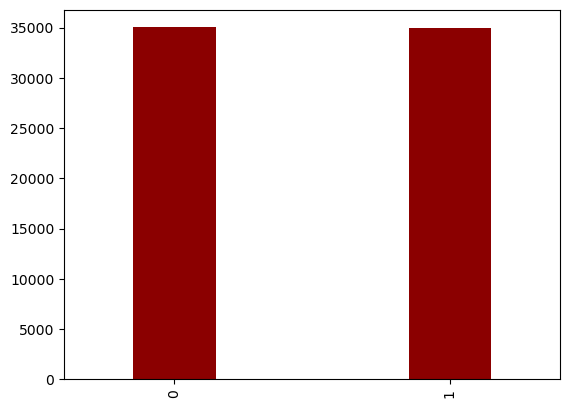

In [116]:
# show if the dataset is balance or imbalance
df['cardio'].value_counts(normalize=True)
pd.value_counts(df['cardio']).plot(kind="bar",color="darkred",width=0.3)

In [117]:
df['age_in_year'] = (df['age'] / 365).round().astype('int')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_year
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


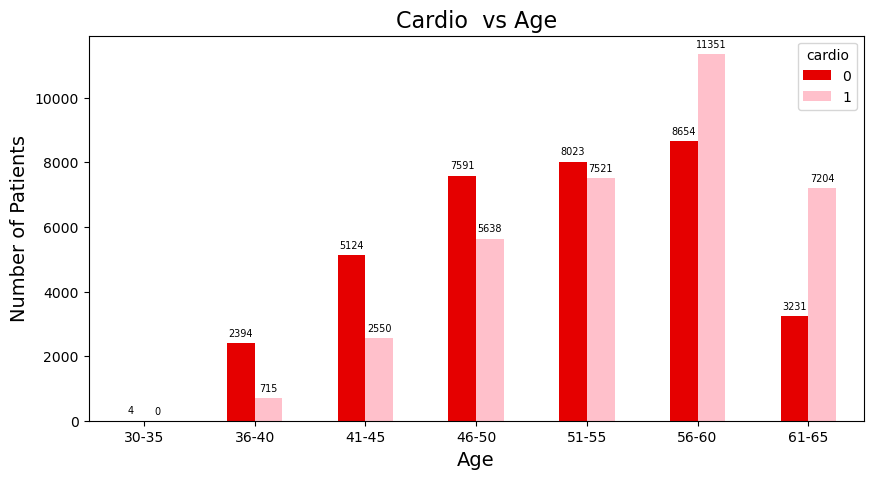

In [118]:
# Create binned age groups
bins = np.array([29, 35,40,45, 50, 55, 60, 65])
labels = ['30-35',  '36-40',  '41-45','46-50','51-55','56-60', '61-65' ]
df['Age Group'] = pd.cut(df['age_in_year'],bins=bins, labels=labels)

# Create crosstab with binned age groups and plot histogram
ct = pd.crosstab(df['cardio'], df['Age Group']).T
ax = ct.plot(kind='bar',  color = ['#E50000','#FFC0CB'], figsize=(10, 5))

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center',
                xytext=(0, 7), textcoords='offset points', fontsize=7)
    
# Set labels and title
ax.set_ylabel('Number of Patients', fontsize=14)
ax.set_xlabel('Age', fontsize=14)
ax.set_xticklabels(labels, rotation=0, fontsize=10)
ax.set_title('Cardio  vs Age', fontsize=16)
# Show the plot
plt.show()

## <center><font color="#110896"> Data Preprocessing

In [119]:
# we can see id columns is just a sequence number, so we can drop the id column
df.drop(["id"],axis=1, inplace = True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_year,Age Group
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,46-50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,51-55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,51-55
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,46-50
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,46-50


In [120]:
# As we all know BMI is the most important feature in Cardiovascular disease.
df["BMI"] = (df["weight"] / (df["height"]/100)**2).round(2)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_year,Age Group,BMI
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,46-50,21.97
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,51-55,34.93
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,51-55,23.51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,46-50,28.71
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,46-50,23.01


In [121]:
# we know that we don't need age. height and weight column 
df.drop(columns=["age", "age_in_year", "height", "weight"],axis=1, inplace = True)
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age Group,BMI
0,2,110,80,1,1,0,0,1,0,46-50,21.97
1,1,140,90,3,1,0,0,1,1,51-55,34.93
2,1,130,70,3,1,0,0,0,1,51-55,23.51
3,2,150,100,1,1,0,0,1,1,46-50,28.71
4,1,100,60,1,1,0,0,0,0,46-50,23.01


In [122]:
# encode the Age Group column
def Age_Group(x):
    if x == '30-35':
        return 0
    elif x == '36-40':
        return 1
    elif x == '41-45':
        return 2
    elif x == '46-50':
        return 3
    elif x == '51-55':
        return 4
    elif x == '56-60':
        return 5   
    else :
        return 6
    

# Apply to Age Group encoder to Age Group column
df['Age Group'] = df['Age Group'].apply(Age_Group)
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age Group,BMI
0,2,110,80,1,1,0,0,1,0,3,21.97
1,1,140,90,3,1,0,0,1,1,4,34.93
2,1,130,70,3,1,0,0,0,1,4,23.51
3,2,150,100,1,1,0,0,1,1,3,28.71
4,1,100,60,1,1,0,0,0,0,3,23.01


#### <font color="#110896"> **Column : Gender**

In [123]:
df["gender"] = df["gender"].replace(to_replace =[2], value =0)
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age Group,BMI
0,0,110,80,1,1,0,0,1,0,3,21.97
1,1,140,90,3,1,0,0,1,1,4,34.93
2,1,130,70,3,1,0,0,0,1,4,23.51
3,0,150,100,1,1,0,0,1,1,3,28.71
4,1,100,60,1,1,0,0,0,0,3,23.01


#### <font color="#110896"> **Column : ap_hi and ap_lo**

In [124]:
#change the column name
df.rename(columns={'ap_hi':'Systolic_blood'},inplace=True)
df.rename(columns={'ap_lo':'Diastolic_blood'},inplace=True)
df.head()

,gender,Systolic_blood,Diastolic_blood,cholesterol,gluc,smoke,alco,active,cardio,Age Group,BMI
0,0,110,80,1,1,0,0,1,0,3,21.97
1,1,140,90,3,1,0,0,1,1,4,34.93
2,1,130,70,3,1,0,0,0,1,4,23.51
3,0,150,100,1,1,0,0,1,1,3,28.71
4,1,100,60,1,1,0,0,0,0,3,23.01


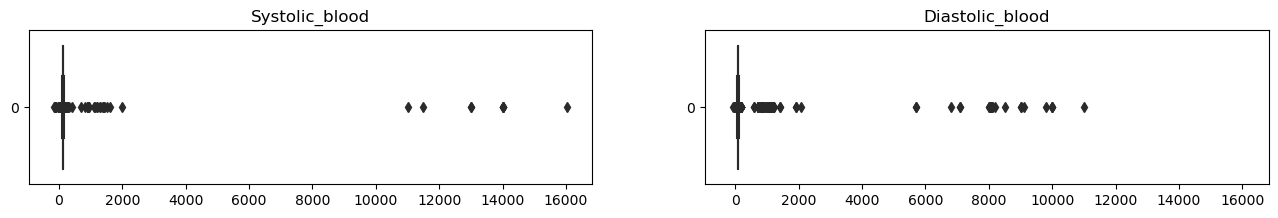

In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 2),sharex=True)
sns.boxplot(df["Systolic_blood"], orient = "h", color = "darkred", ax = ax1)
sns.boxplot(df["Diastolic_blood"], orient = "h", color = "darkred", ax = ax2)
ax1.set_title('Systolic_blood')
ax2.set_title('Diastolic_blood')
plt.show()

In [126]:
# delete outlaiers
df.drop(df[(df['Systolic_blood'] > df['Systolic_blood'].quantile(0.975)) | (df['Systolic_blood'] < df['Systolic_blood'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['Diastolic_blood'] > df['Diastolic_blood'].quantile(0.975)) | (df['Diastolic_blood'] < df['Diastolic_blood'].quantile(0.025))].index,inplace=True)

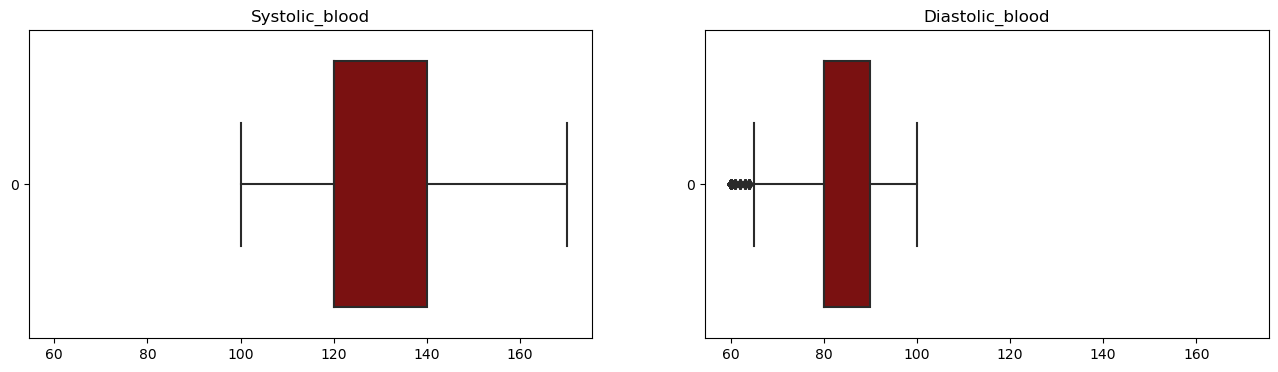

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4),sharex=True)
sns.boxplot(df["Systolic_blood"], orient = "h", color = "darkred", ax = ax1)
sns.boxplot(df["Diastolic_blood"], orient = "h", color = "darkred", ax = ax2)
ax1.set_title('Systolic_blood')
ax2.set_title('Diastolic_blood')
plt.show()

#### <font color="#110896"> **Correlation matrix**

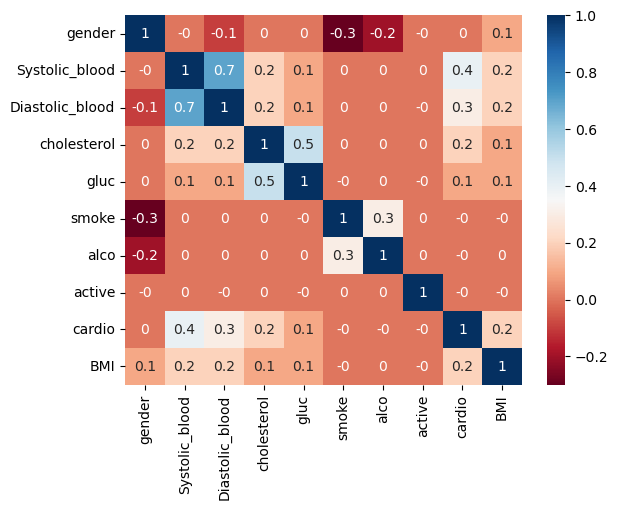

In [128]:
#show correlation matrix for all variable
correlation=df.corr().round(1)
sns.heatmap(correlation,cmap='RdBu',annot=True)
plt.show()

In [129]:
# As we can see we have 'active','alco' and 'smoke' has negative correlation with target variable so we can drop them for further analysis
df = df.drop(columns = ['active','alco','smoke'] ,axis=1)
df.head()

,gender,Systolic_blood,Diastolic_blood,cholesterol,gluc,cardio,Age Group,BMI
0,0,110,80,1,1,0,3,21.97
1,1,140,90,3,1,1,4,34.93
2,1,130,70,3,1,1,4,23.51
3,0,150,100,1,1,1,3,28.71
4,1,100,60,1,1,0,3,23.01


### <font color="#110896"> **Separeate the variables into feature matrix (X) and target variable (y).**

In [130]:
X = df[['gender', 'Systolic_blood', 'Diastolic_blood', 'cholesterol', 'gluc', 'Age Group', 'BMI']]
y = df[["cardio"]]

### <font color="#110896"> **Splitting the data for Training and Testing (Test size=30%)**

In [131]:
# split into taining (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

### <font color="#110896"> Normalaize the Data

In [132]:
from sklearn.preprocessing import MinMaxScaler
# create a MinMaxScaler object
scaler = MinMaxScaler()
# fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# <center><u><font color="#110896"> **KNeighbors Classifier**

--------------------------------------------------------------------------------
Model: KNeighborsClassifier
Accuracy: 0.689
Precision: 0.688
Recall: 0.676
F1-score: 0.682
------------------------------------------------------------------------------------------------------------------------
		  The Accuracy Score : 0.689

              precision    recall  f1-score   support

           0       0.69      0.70      0.70     10070
           1       0.69      0.68      0.68      9788

    accuracy                           0.69     19858
   macro avg       0.69      0.69      0.69     19858
weighted avg       0.69      0.69      0.69     19858

			Coufusion Matrix


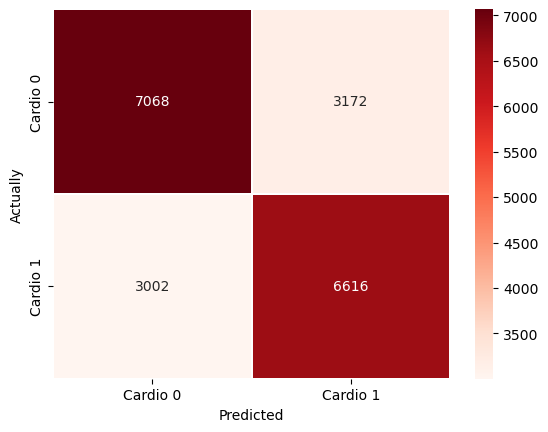

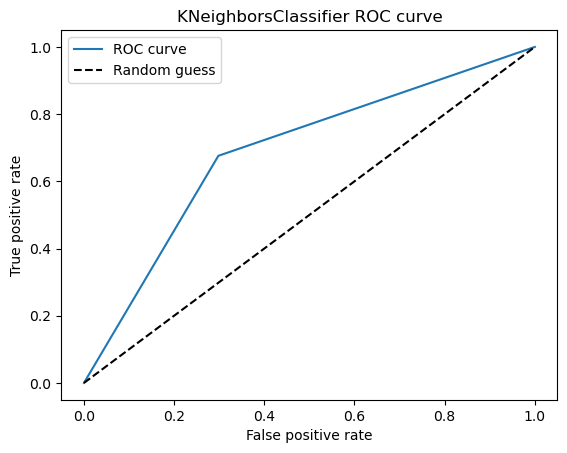

In [133]:
# KNeighborsClassifier
kn = KNeighborsClassifier() 
# fit the model
kn.fit(X_train_scaled, y_train)
# test the model on the test data
y_pred = kn.predict(X_test_scaled)

# compute evaluation metrics
acc_kn = accuracy_score(y_test, y_pred)
precision_kn = precision_score(y_test, y_pred)
recall_kn = recall_score(y_test, y_pred)
f1_kn = f1_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# print evaluation metrics
print('-' * 80)
print(f'Model: KNeighborsClassifier')
print(f'Accuracy: {acc_kn:.3f}')
print(f'Precision: {precision_kn:.3f}')
print(f'Recall: {recall_kn:.3f}')
print(f'F1-score: {f1_kn:.3f}')


# print accuracy score
dash = '-' * 120
print(dash)
print(f"\t\t  The Accuracy Score : %0.3f\n" % acc_kn)
# print report precision, recall, f1 score, support
print(classification_report(y_test, y_pred))

# print confusion matrix
print(f"\t\t\tCoufusion Matrix")
sns.heatmap(confusion_matrix(y_pred, np.array(y_test)),fmt=".0f", 
            annot=True,linewidths=0.2, cmap='Reds', xticklabels= ["Cardio 0", "Cardio 1"],
       yticklabels= ["Cardio 0", "Cardio 1"])
plt.xlabel("Predicted")
plt.ylabel("Actually")
plt.show()

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'KNeighborsClassifier ROC curve')
plt.legend()
plt.show()



## <center><u><font color="#110896"> **Improve model’s performance Of KNeighborsClassifier using hyperparameters**

--------------------------------------------------------------------------------
Best Hyperparameters: {'n_neighbors': 7, 'weights': 'uniform'}
Model: KNeighborsClassifier
Accuracy: 0.702
Precision: 0.705
Recall: 0.679
F1-score: 0.692
------------------------------------------------------------------------------------------------------------------------
		  The Accuracy Score: 0.702

              precision    recall  f1-score   support

           0       0.70      0.72      0.71     10070
           1       0.70      0.68      0.69      9788

    accuracy                           0.70     19858
   macro avg       0.70      0.70      0.70     19858
weighted avg       0.70      0.70      0.70     19858



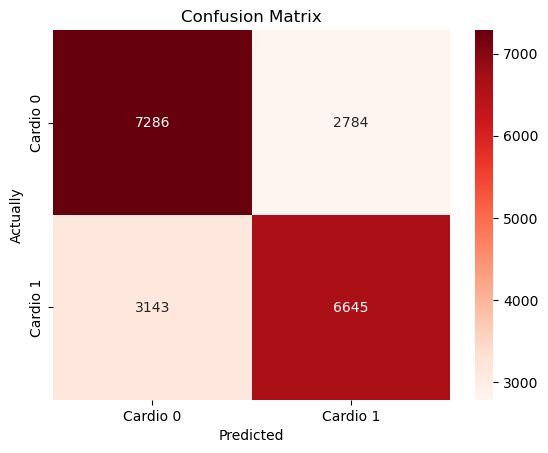

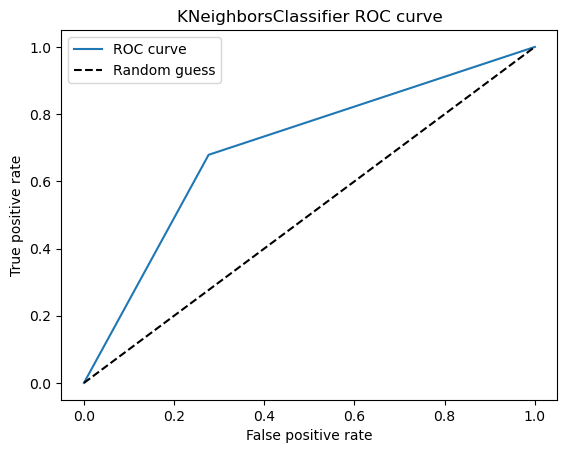

In [134]:
# Define the hyperparameters to tune
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance']}

# Create the KNeighborsClassifier model
kn = KNeighborsClassifier()

# Perform grid search cross-validation
grid_kn = GridSearchCV(kn, param_grid, cv=5, scoring='accuracy')
grid_kn.fit(X_train_scaled, y_train)

# Get the best hyperparameters and model
best_kn = grid_kn.best_estimator_
best_params_kn = grid_kn.best_params_

# Test the model on the test data
y_pred = best_kn.predict(X_test_scaled)

# Compute evaluation metrics
acc_kn = accuracy_score(y_test, y_pred)
precision_kn = precision_score(y_test, y_pred)
recall_kn = recall_score(y_test, y_pred)
f1_kn = f1_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


# Print evaluation metrics
print('-' * 80)
print(f"Best Hyperparameters: {best_params_kn}")
print(f"Model: KNeighborsClassifier")
print(f"Accuracy: {acc_kn:.3f}")
print(f"Precision: {precision_kn:.3f}")
print(f"Recall: {recall_kn:.3f}")
print(f"F1-score: {f1_kn:.3f}")


# Print accuracy score, classification report, and confusion matrix
print(dash)
print(f"\t\t  The Accuracy Score: {acc_kn:.3f}\n")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
#plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", cmap='Reds', xticklabels=["Cardio 0", "Cardio 1"],
            yticklabels=["Cardio 0", "Cardio 1"])
plt.xlabel("Predicted")
plt.ylabel("Actually")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier ROC curve')
plt.legend()
plt.show()



# <center><u><font color="#110896"> **Naive Baye Classifier** 

--------------------------------------------------------------------------------
Model: NB_Classifier
Accuracy: 0.7133
Precision: 0.7589
Recall: 0.6131
F1-score: 0.6783
------------------------------------------------------------------------------------------------------------------------
		  The Accuracy Score : 0.7133

              precision    recall  f1-score   support

           0       0.68      0.81      0.74     10070
           1       0.76      0.61      0.68      9788

    accuracy                           0.71     19858
   macro avg       0.72      0.71      0.71     19858
weighted avg       0.72      0.71      0.71     19858

			Coufusion Matrix


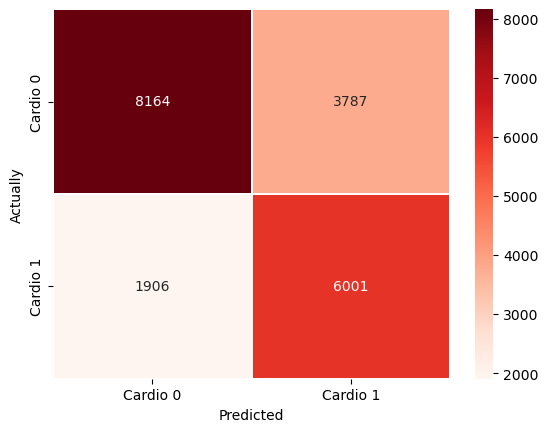

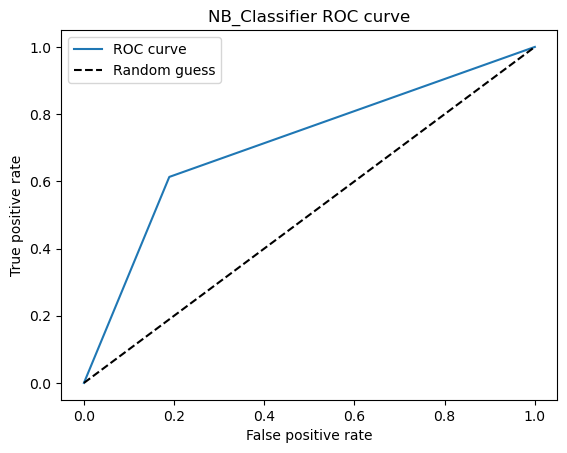

In [135]:
# NBclassifier
nb = GaussianNB() 

# fit the model
nb.fit(X_train_scaled, y_train)

# test the model on the test data
y_pred = nb.predict(X_test_scaled)

# compute evaluation metrics
acc_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred)
recall_nb = recall_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred)


# print evaluation metrics
print('-' * 80)
print(f'Model: NB_Classifier')
print(f'Accuracy: {acc_nb:.4f}')
print(f'Precision: {precision_nb:.4f}')
print(f'Recall: {recall_nb:.4f}')
print(f'F1-score: {f1_nb:.4f}')


# print accuracy score
dash = '-' * 120
print(dash)
print(f"\t\t  The Accuracy Score : %0.4f\n" % acc_nb)
# print report precision, recall, f1 score, support
print(classification_report(y_test, y_pred))
# print confusion matrix
print(f"\t\t\tCoufusion Matrix")
sns.heatmap(confusion_matrix(y_pred, np.array(y_test)),fmt=".0f", 
            annot=True,linewidths=0.2, cmap='Reds', xticklabels= ["Cardio 0", "Cardio 1"],
       yticklabels= ["Cardio 0", "Cardio 1"])
plt.xlabel("Predicted")
plt.ylabel("Actually")
plt.show()

# plot ROC curve
plt.plot(fpr_nb, tpr_nb, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'NB_Classifier ROC curve')
plt.legend()
plt.show()

## <center><u><font color="#110896"> **Improve model’s performance Of Naive Baye Classifier using hyperparameters**

Fitting 18 folds for each of 120 candidates, totalling 2160 fits
--------------------------------------------------------------------------------
Model: GaussianNB (with Hyperparameter Tuning)
Accuracy: 0.7136
Precision: 0.7594
Recall: 0.6132
F1-score: 0.6785
------------------------------------------------------------------------------------------------------------------------
		  The Accuracy Score: 0.71357

              precision    recall  f1-score   support

           0       0.68      0.81      0.74     10070
           1       0.76      0.61      0.68      9788

    accuracy                           0.71     19858
   macro avg       0.72      0.71      0.71     19858
weighted avg       0.72      0.71      0.71     19858



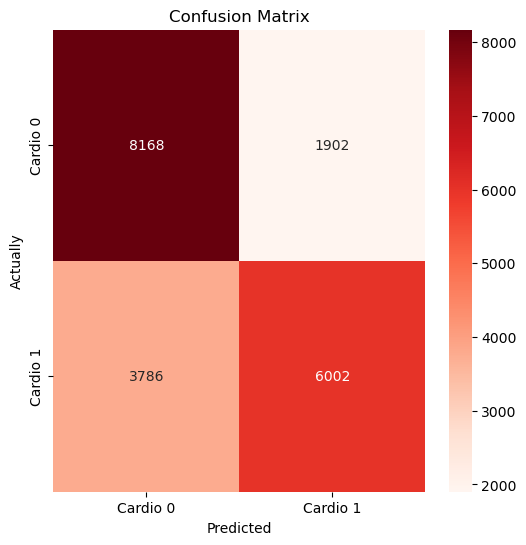

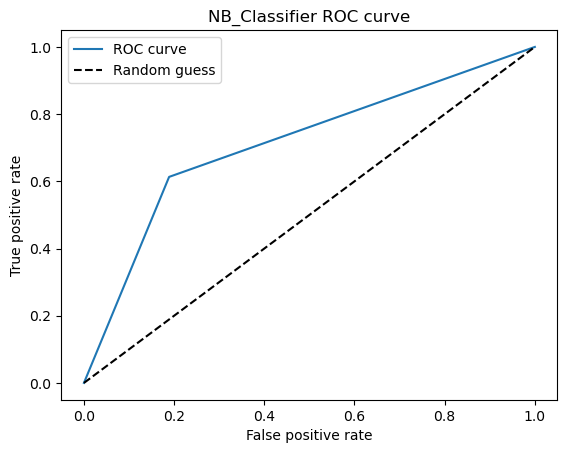

In [136]:
from sklearn.model_selection import RepeatedStratifiedKFold
# Cross-Validation method
cross_validation = RepeatedStratifiedKFold(n_splits=3, n_repeats=6, random_state=999)
# Define the hyperparameters to tune
param_nb = {'var_smoothing': np.logspace(0,-15, num=120)}

# Create the NBClassifier model
nb = GaussianNB()
# Perform grid search cross-validation
grid_nb = GridSearchCV(estimator=nb, param_grid=param_nb,cv=cross_validation, verbose=1,scoring='accuracy')
grid_nb.fit(X_train_scaled, y_train)
# Get the best hyperparameters and model
best_nb = grid_nb.best_estimator_
best_params_nb = grid_kn.best_params_
# Test the model on the test data
y_pred = best_nb.predict(X_test_scaled)
# Compute evaluation metrics
acc_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred)
recall_nb = recall_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred)


# Print evaluation metrics
print('-' * 80)
print(f'Model: GaussianNB (with Hyperparameter Tuning)')
print(f"Accuracy: {acc_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-score: {f1_nb:.4f}")


# Print accuracy score, classification report, and confusion matrix
print(dash)
print(f"\t\t  The Accuracy Score: {acc_nb:.5f}\n")
print(classification_report(y_test, y_pred))
# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", cmap='Reds', xticklabels=["Cardio 0", "Cardio 1"],
            yticklabels=["Cardio 0", "Cardio 1"])
plt.xlabel("Predicted")
plt.ylabel("Actually")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
plt.plot(fpr_nb, tpr_nb, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('NB_Classifier ROC curve')
plt.legend()
plt.show()